# Convolution in Machine learning

**Authors:**

* FOZAME ENDEZOUMOU Armand Bryan
* Jessica MBOUNKAP
* Maheni SOUMAH
* LEUMALEU MBOUYOM Arnold Vianey
* William TOWA Darryl KENGNE
* Habiba  DJIGO





### Work:
Our job with this notebook is to be able to carry out a convolution from scratch. Therefore we need to understand what a convolution is, how it works and what it is for.

### Definition:
In mathematics, the convolution product stands as a fundamental bilinear operator and a commutative product, typically represented as "$*$". Given two functions ( $f$) and ( $g$ ) defined over the same infinite domain, it yields another function, denoted as ( $f * g$ ), defined on this domain. At any given point within this domain, it equates to the integral (or summation if discrete) of one function over the entire domain, weighted by the other function around the origin. This operation involves traversing the two functions in opposite directions to ensure commutativity.

In the realm of image processing, a kernel, also referred to as a convolution matrix or mask, emerges as a pivotal tool. This small matrix facilitates various operations such as blurring, image sharpening, embossing, and edge detection. These transformations are achieved through convolving the kernel with the image, effectively applying its weighted values to different regions of the image. This process enables the extraction of features, enhancement of details, and alteration of image characteristics based on the properties encoded within the kernel.

### How it works?
Convolution is a matrix operation where one matrix, the input, is convolved with another matrix, known as the $kernel$ or $filter$. This operation is commonly used in image processing and deep learning for feature extraction.

In $2D$ convolution, we apply the kernel to a matrix of size ($m,n$), while in $1D$ convolution, it's applied to a vector, and in $3D$ convolution, it's applied to a tensor.

The purpose of convolution is primarily to extract important information from the input. The kernel acts as a filter, highlighting certain features present in the input matrix.

During convolution, we place the kernel at the beginning of the matrix and slide it across the matrix until we reach the end. This process helps capture spatial relationships and patterns in the data.

The $stride$ parameter controls the movement of the convolution kernel over the input image. It determines the number of pixels the kernel moves at each step. Increasing the stride can compress information further and speed up computation.

$Padding$ is another important technique used in convolution. It involves adding extra pixels around the borders of the input image before applying the convolution kernel. Padding is often done with zeros ("zero-padding"), although other values can be used. Its purposes include preserving output size, retaining information at the edges, and maintaining spatial characteristics.

In deep learning, the result of a convolution is called a **feature map**.

The $'valid'$ convolution mode, commonly used with a stride of 1 and padding of 0, produces output without padding. The $'full'$ mode allows for padding with borders.

To determine the output size of a matrix during convolution, we use the formula:

$$m_{out} = \frac{m_{in} + 2p - f}{s} + 1$$

where:
- $m_{out}$ is the output matrix, 
- $m_{in}$ is the input matrix, 
- $p$ is the padding value, 
- $f$ is the kernel size, 
- and $s$ is the stride.

![Caption](images/conv.png)

### What is convolution used for in deep learning:

Convolution plays a crucial role in deep learning, particularly in convolutional neural networks (CNNs), due to its filtering nature, allowing for the extraction of important features from images. The resulting feature maps are then vectorized and fed into a large network of functions for various tasks such as classification or segmentation.

CNNs utilize convolutional layers to reduce the complexity of calculations in multilayer perceptrons (MLPs) by significantly reducing the number of parameters. This reduction leads to fewer computations. Additionally, convolution has the ability to capture spatial information and edges, which a simple MLP may not be able to achieve.

The combination of convolution and MLPs gives rise to convolutional neural networks (CNNs), which have revolutionized various fields, particularly computer vision tasks. These networks excel in tasks like image recognition, object detection, and image segmentation.

![Caption](images/cnn.jpeg)

### Time to code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
class Convolution:
    """
    In image processing, a kernel, convolution matrix, or mask is a small matrix used for blurring, image sharpening, embossing, edge detection, and others. 
    All this is accomplished by doing a convolution between the kernel and the image.
    """
    def __init__(self):
        self.stride = None
        self.x_in = None
        self.kernel = None
        self.mode = None

    def check_dim(self):
        """
        Check the dimensions of the input matrix and the convolution kernel.
        """
        if self.x_in is None or self.kernel is None:
            raise ValueError('The dimension of the matrix or the kernel is not defined')
        elif len(self.x_in.shape) != 2 or len(self.kernel.shape) != 2:
            raise ValueError('Matrix or kernel need to be in 2D array')

    def validate_dim(self): 
        """
        Validate the dimensions of the input matrix and the convolution kernel.
        """
        if len(self.x_in) < len(self.kernel): 
            raise ValueError('The size of the input matrix must be greater than the size of the convolution kernel')

    def shape_conv(self):
        """
        Calculate the output shape of the convolution operation based on the mode.
        """
        if self.mode == 'valid':
            h_out = (self.x_in.shape[0] - self.kernel.shape[0] + 1) // self.stride
            w_out = (self.x_in.shape[1] - self.kernel.shape[1] + 1) // self.stride
            return (int(h_out), int(w_out))
        elif self.mode == 'full':
            h_out = ((self.x_in.shape[0] + (2*self.padding) - self.kernel.shape[0]) // self.stride) + 1
            w_out = ((self.x_in.shape[1] + (2*self.padding) - self.kernel.shape[1]) // self.stride) + 1
            return (int(h_out), int(w_out))
        elif self.mode == 'same':
            return 0
        else:
            raise ValueError('Unknown mode')

    def valid_conv(self):
        """
        Perform a valid convolution operation.
        """
        h_out, w_out = self.shape_conv()
        conv_matrix = np.zeros((h_out, w_out))
        n_i, n_j = self.kernel.shape[0], self.kernel.shape[1]
        s_i = 0  # Initialize row stride offset
        for i in range(h_out):
            s_j = 0  # Initialize column stride offset
            for j in range(w_out):
                sub_matrix = self.x_in[i+s_i:i+s_i+n_i, j+s_j:+j+s_j+n_j]  # Extract sub matrix
                conv_matrix[i, j] = np.sum(sub_matrix * self.kernel)  # Compute convolution
                s_j += self.stride - 1  # Increment column stride offset
            s_i += self.stride - 1  # Increment row stride offset
        return conv_matrix

    def full_conv(self):
        """
        Perform a full convolution operation.
        """
        h_out, w_out = self.shape_conv()
        conv_matrix = np.zeros((h_out, w_out))

        # Adjust padding to match kernel size
        padding_i = (self.kernel.shape[0] - 1) // 2
        padding_j = (self.kernel.shape[1] - 1) // 2
        padded_x_in = np.pad(self.x_in, ((padding_i, padding_i), (padding_j, padding_j)), mode='constant')

        for i in range(h_out):
            for j in range(w_out):
                # Extract sub matrix with adjusted padding
                sub_matrix = padded_x_in[i:i+self.kernel.shape[0], j:j+self.kernel.shape[1]]
                # Perform element-wise multiplication and sum
                conv_matrix[i, j] = np.sum(sub_matrix * self.kernel)

        return conv_matrix

    def fit(self, x_in, kernel, stride=1, padding=0, mode='valid'):
        """
        Apply the convolution operation based on the specified mode.
        """
        self.x_in = x_in
        self.kernel = kernel
        self.stride = stride
        self.padding = padding
        self.mode = mode

        try:
            self.check_dim()
            self.validate_dim()
        except Exception as e:
            print(e)
            return None

        if mode == 'valid':
            return self.valid_conv()
        elif mode == 'full':
            return self.full_conv()
        else:
            raise ValueError('Invalid convolution mode, please read the documentation of the method')

In [3]:
# Let's goo
# Initialize matrix

M = np.array(([[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [2, 3, 4, 5, 6, 7, 8, 9, 1],
 [3, 4, 5, 6, 7, 8, 9, 1, 2],
 [4, 5, 6, 7, 8, 9, 1, 2, 3],
 [5, 6, 7, 8, 9, 1, 2, 3, 4],
 [6, 7, 8, 9, 1, 2, 3, 4, 5],
 [7, 8, 9, 1, 2, 3, 4, 5, 6],
 [8, 9, 1, 2, 3, 4, 5, 6, 7],
 [9, 1, 2, 3, 4, 5, 6, 7, 8]]))

print('Shape of the matrix M: ' +str(M.shape))
print('Matrix = \n {}'.format(M))

Shape of the matrix M: (9, 9)
Matrix = 
 [[1 2 3 4 5 6 7 8 9]
 [2 3 4 5 6 7 8 9 1]
 [3 4 5 6 7 8 9 1 2]
 [4 5 6 7 8 9 1 2 3]
 [5 6 7 8 9 1 2 3 4]
 [6 7 8 9 1 2 3 4 5]
 [7 8 9 1 2 3 4 5 6]
 [8 9 1 2 3 4 5 6 7]
 [9 1 2 3 4 5 6 7 8]]


In [4]:
k = np.ones((3,3))# k as kernel for the convolution
k = np.diag(np.diag(k))
print('Shape of the kernel k: ' +str(k.shape))
print('kernel = \n {}'.format(k))

Shape of the kernel k: (3, 3)
kernel = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
# Initialize the class convolution
Conv = Convolution()

In [6]:
# Apply convolution
result = Conv.fit(M,k)
print(result)

[[ 9. 12. 15. 18. 21. 15. 18.]
 [12. 15. 18. 21. 15. 18. 12.]
 [15. 18. 21. 15. 18. 12. 15.]
 [18. 21. 15. 18. 12. 15.  9.]
 [21. 15. 18. 12. 15.  9. 12.]
 [15. 18. 12. 15.  9. 12. 15.]
 [18. 12. 15.  9. 12. 15. 18.]]


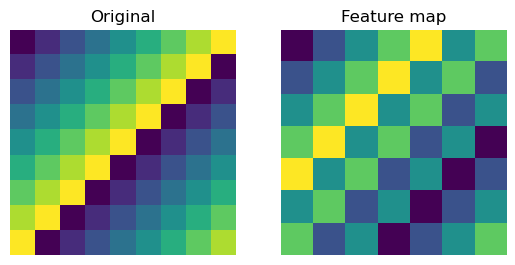

In [7]:
def plot_images(orig_img, img, cmap=None):
    """
    Plot the original images and the convolution one
    """
    fig, axes = plt.subplots(1,2)
    
    #orig image
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[0].imshow(orig_img, cmap=cmap)
    
    #convolute image
    axes[1].set_title('Feature map')
    axes[1].axis('off')
    axes[1].imshow(img, cmap=cmap)
    
plot_images(M, result)

[[ 9. 15. 21.]
 [15. 21. 18.]
 [21. 18. 15.]]


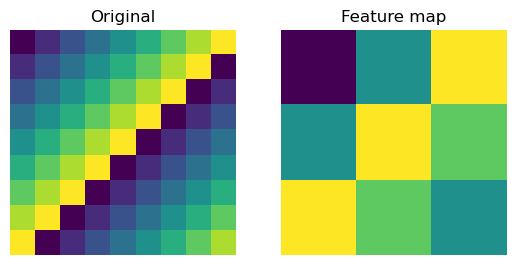

In [8]:
# With a stride = 2
result2 = Conv.fit(M,k, stride = 2)
print(result2)
plot_images(M,result2)

[[ 4.  6.  8. 10. 12. 14. 16.  9.  9.]
 [ 6.  9. 12. 15. 18. 21. 15. 18.  9.]
 [ 8. 12. 15. 18. 21. 15. 18. 12. 11.]
 [10. 15. 18. 21. 15. 18. 12. 15.  4.]
 [12. 18. 21. 15. 18. 12. 15.  9.  6.]
 [14. 21. 15. 18. 12. 15.  9. 12.  8.]
 [16. 15. 18. 12. 15.  9. 12. 15. 10.]
 [ 9. 18. 12. 15.  9. 12. 15. 18. 12.]
 [ 9.  9. 11.  4.  6.  8. 10. 12. 14.]]


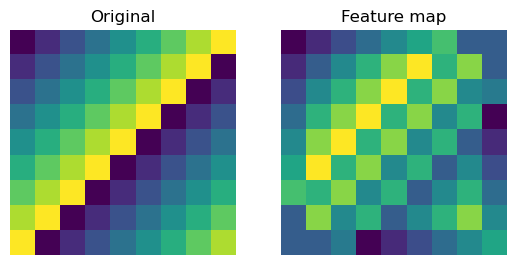

In [9]:
# With a padding = 1
result3 = Conv.fit(M,k, padding = 1, mode='full')
print(result3)
plot_images(M,result3)

```Interpretation:```

- Here are the results. We can observe that the image attempts to center itself to avoid losing information from the edges.
- As the stride increases, more information is lost.

Now, let's delve into images. You're probably curious about how they're used. Well, it follows the same principle.

A modern image, typically in color, is composed of 3 channels, with the most common and popular being RGB (Red-Green-Blue). This means that an image consists of 3 stacked matrices. Thus, we need to perform convolution on each of these matrices separately and then sum them up to obtain the final feature map.


In the next scenario, we will simply use an image without considering the color channels. Therefore, we will have a $2D$ image that will serve as an example here.

For better visualization, we will use `cmap='gray'`.

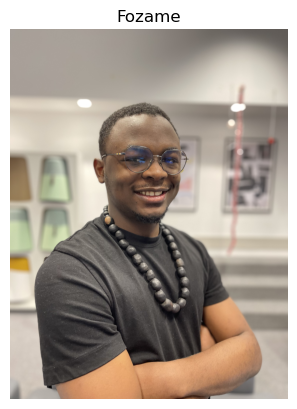

In [10]:
img_fozame = cv2.imread('images/FOZY.jpg')
img_fozame = cv2.cvtColor(img_fozame, cv2.COLOR_BGR2RGB)
plt.title('Fozame')
plt.axis('off')
plt.imshow(img_fozame)

In [11]:
fozame2d = img_fozame[:,:,0]
print('Shape before: '+str(img_fozame.shape))
print('Shape now: ' +str(fozame2d.shape))

Shape before: (4032, 3024, 3)
Shape now: (4032, 3024)


In [12]:
# Test new kernel
new_k = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
print(new_k)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


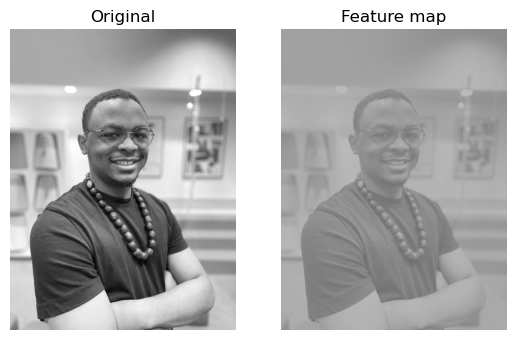

In [13]:
result_fozame = Conv.fit(fozame2d, new_k, stride = 2)
plot_images(fozame2d, result_fozame, cmap='gray')